<a href="https://colab.research.google.com/github/VidyaValsalan/MachineLearning/blob/master/LSTMSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15 (3).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 2599 bytes


In [ ]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','loc1','loc2','loc3','loc4','loc5'])
df1.head(5)
a=input('enter the location')

enter the locationloc1


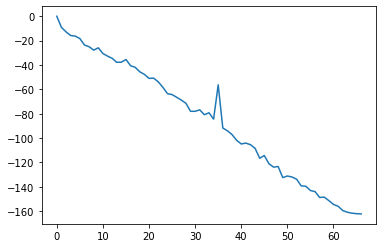

In [ ]:
df1=df1.reset_index()[a]
df1.plot()


In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.265211
p-value: 0.930289
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 4, 50)             10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 4, 50)             20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1000,batch_size=64,verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4147 - val_loss: 0.0101
Epoch 2/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3943 - val_loss: 0.0085
Epoch 3/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3742 - val_loss: 0.0070
Epoch 4/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3538 - val_loss: 0.0057
Epoch 5/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3328 - val_loss: 0.0047
Epoch 6/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3107 - val_loss: 0.0039
Epoch 7/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.2876 - val_loss: 0.0034
Epoch 8/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2632 - val_loss: 0.0034
Epoch 9/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2375 - val_loss: 0.0041
Epoch 10/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.2105 - val_loss: 0.0055
Epoch 11/10

In [ ]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

67.97742306891148

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

140.70943124358018

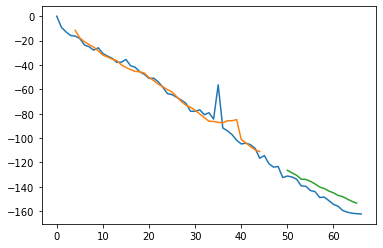

In [ ]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
